# Function to choose Classification algo with Cross_Validation

### roc_auc_score for BiClasss

- This code alows you to make a choice for classification algo.
- Cross_validation aplied here
- Decision made by mean score from cross_validation
- Different scores can be used

In [7]:
# Cross_val for small dataset not good to use

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import gc
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from catboost import Pool, CatBoostClassifier

from sklearn.preprocessing import StandardScaler

from numpy import argmax
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:]
y = iris.target

train = pd.DataFrame(iris.data[:], columns=iris.feature_names[:])
y = pd.DataFrame(y, columns=['Species'])

In [3]:
# Algo compare with cross_valid and KFold

In [4]:
#Algo compare with cross_valid and KFold

#score-accuracy_score or roc_auc_score
def model_mass_cross_val_calc(X,y,cv,score_your):
    
    #my_scorer = make_scorer(roc_auc_score)
    my_scorer = make_scorer(score_your)
    #Some parameters

    svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
    
    #Scale

    sc = StandardScaler()
    X_sc=sc.fit_transform(X)

    #Search knn_param
    
    a_index=list(range(1,11))
    knn=[1,2,3,4,5,6,7,8,9,10]
    a=[]
    for i in knn:
        model=KNeighborsClassifier(n_neighbors=i)
        scores = cross_val_score(model,X_sc, y, cv=cv, scoring=my_scorer)
        #model.fit(X_train_std, y_train)
        #prediction=model.predict(X_test_std)
        a.append(scores.mean())

    #Max_Score_KNN
    knn=pd.DataFrame(knn)
    a=pd.DataFrame(a)
    knn_data=pd.concat([knn,a],axis=1)
    knn_data.columns=['Neig','Score']
    knn_take=int(knn_data[knn_data['Score']==knn_data['Score'].max()][:1]['Neig'])

    #model
    
    x=['CatB','XGB','RandomF','NB','svm.SVC','Log','DTr',str('KN='+str(knn_take))]
    
    #Form for cycle

    models=[CatBoostClassifier(logging_level='Silent'),XGBClassifier(),RandomForestClassifier(),GaussianNB(),svm,LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=knn_take)]
    a_index=list(range(1,len(models)+1))
    a=[]
    for model in models:
        scores = cross_val_score(model,X_sc, y, cv=cv, scoring=my_scorer)

        a.append(scores.mean())
        
    plt.plot(x, a)
    #plt.xticks(x)
    #MAX_Score+Model
    x=pd.DataFrame(x)
    a=pd.DataFrame(a)
    all_scores=pd.concat([x,a],axis=1)
    all_scores.columns=['model','Score']
    print('Max_score:',all_scores[all_scores['Score']==all_scores['Score'].max()])


In [5]:
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


C:\anaconda1\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda1\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda1\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda1\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\anaconda1\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda1\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda1\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\anaconda1\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

Max_score:      model     Score
0     CatB  0.966667
2  RandomF  0.966667
4  svm.SVC  0.966667
5      Log  0.966667
6      DTr  0.966667


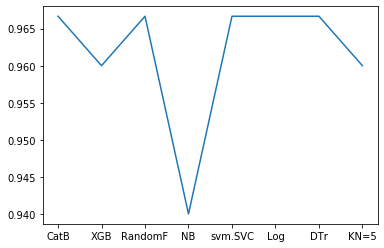

In [6]:
model_mass_cross_val_calc(train,y,3,accuracy_score)